<a href="https://colab.research.google.com/github/codestates/ds-sc11x/blob/master/ds_sc11x%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요.


In [171]:
import pandas as pd
import numpy as np
# import 

In [172]:
df1 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv')
df2 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv')
df3 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv')


In [173]:
df1 = df1.iloc[:, 1:]
df2 = df2.iloc[:, 1:]
df3 = df3.iloc[:, 1:]

결측치 확인

In [174]:
df1.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [175]:
df2.isnull().sum()


geo           0
time          0
population    0
dtype: int64

In [176]:
df3.isnull().sum()


geo        0
country    0
dtype: int64

산점도

In [177]:
pd.set_option('float_format', '{:.5f}'.format)

In [178]:
df1['cell_phones_total'].describe()

count         9574.00000
mean       9612757.62722
std       61294831.26191
min              0.00000
25%              0.00000
50%           9000.00000
75%        1845915.50000
max     1725695000.00000
Name: cell_phones_total, dtype: float64

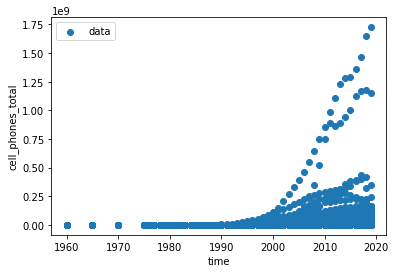

In [179]:
# 산점도(scatter) 그리기

import matplotlib.pylab as plt

plt.scatter( df1['time'],df1['cell_phones_total'], label = "data")

plt.legend(loc = "best")
plt.ylabel('cell_phones_total')
plt.xlabel('time')
plt.show()


### 2. Join data

다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|


In [180]:
df = pd.merge(df1, df2, on=['geo','time'])
df = pd.merge(df, df3, on='geo')
df

,geo,time,cell_phones_total,population,country
0,abw,1960,0.00000,54211,Aruba
1,abw,1965,0.00000,57360,Aruba
2,abw,1970,0.00000,59063,Aruba
3,abw,1975,0.00000,60657,Aruba
4,abw,1976,0.00000,60586,Aruba
...,...,...,...,...,...
9563,zwe,2015,12757410.00000,13814629,Zimbabwe
9564,zwe,2016,12878926.00000,14030331,Zimbabwe
9565,zwe,2017,14092104.00000,14236595,Zimbabwe
9566,zwe,2018,12908992.00000,14438802,Zimbabwe


In [181]:
df.shape

(9568, 5)

### 3. Feature Engineering

인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 

그 결과로 2019년 한국에서 PPP가 1.3448이 나와야 합니다. (해당 내역을 보여주세요.)

In [182]:
df['PPP'] = df['cell_phones_total'] / df['population']

# df[df['country']== 'South Korea'  & df['time']==2019]

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 9567
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geo                9568 non-null   object 
 1   time               9568 non-null   int64  
 2   cell_phones_total  9568 non-null   float64
 3   population         9568 non-null   int64  
 4   country            9568 non-null   object 
 5   PPP                9568 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 523.2+ KB


In [184]:
t = df['time']==2019 
df[ df['time']==2019 ]

,geo,time,cell_phones_total,population,country,PPP
88,afg,2019,22580071.00000,38041754,Afghanistan,0.59356
136,ago,2019,14830154.00000,31825295,Angola,0.46599
184,alb,2019,2630076.00000,2880917,Albania,0.91293
232,and,2019,87909.00000,77142,Andorra,1.13957
270,are,2019,19602815.00000,9770529,United Arab Emirates,2.00632
...,...,...,...,...,...,...
9285,vnm,2019,136230406.00000,96462106,Vietnam,1.41227
9333,vut,2019,265219.00000,299882,Vanuatu,0.88441
9471,zaf,2019,96972459.00000,58558270,South Africa,1.65600
9519,zmb,2019,17220607.00000,17861030,Zambia,0.96414


* 2019년 한국에서 PPP

In [185]:
c = df['country'] == 'South Korea'
df[c & t]

,geo,time,cell_phones_total,population,country,PPP
4805,kor,2019,68892541.00000,51225308,South Korea,1.34489


### 4. Data Manipulation

각 나라별로 평균 PPP를 계산하세요.

가장 많은 PPP 값을 갖는 top 10 country 를 구하세요.

다음과 비슷한 결과가 나와야 합니다. 

|country|PPP|
|:-:|:-:|
|are|0.741916|
|sau|0.757034|
|lie|0.806225|
|hkg|0.810664|
|mac|0.818130|
|isr|0.840197|
|srb|0.951586|
|nld_curacao|1.259227|
|mne|1.574349|
|sxm|1.899506|


In [186]:
con_m = df['PPP'].groupby(df['country']).mean()
con_m

country
Afghanistan             0.13340
Albania                 0.32424
Algeria                 0.29932
American Samoa          0.01215
Andorra                 0.34708
                          ...  
Vietnam                 0.34932
Virgin Islands (U.S.)   0.12725
Yemen                   0.13633
Zambia                  0.17323
Zimbabwe                0.20069
Name: PPP, Length: 213, dtype: float64

In [200]:
# 가장 많은 PPP 값을 갖는 top 10 country 
pd.set_option('float_format', '{:.6f}'.format)

cm = pd.DataFrame(con_m, columns=[ 'PPP'])
cm.sort_values('PPP', ascending=False)[:10].sort_values('PPP', ascending=True)

,PPP
country,
United Arab Emirates,0.741916
Saudi Arabia,0.757034
Liechtenstein,0.806225
"Hong Kong, China",0.810664
"Macao, China",0.818130
Israel,0.840197
Serbia,0.951586
Curaçao,1.259227
Montenegro,1.574349


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [188]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

### 위에 과제에서 이미 df 이름으로 사용하여서 데이터프레임 이름을 df2로 수정하였습니다 ###
df2 = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df2 = df2.set_index('date')
df2 = df2.sort_index()

data_for_graph = df2.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.08735,1.10749
2019-04-28,3.70764,1.29582
2019-05-05,2.80517,1.30612
2019-05-12,3.23585,1.04539
2019-05-19,2.49462,1.11959


아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>


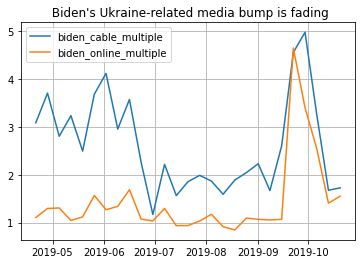

In [202]:
plt.plot( data_for_graph['biden_cable_multiple'])
plt.plot( data_for_graph['biden_online_multiple'])
plt.legend(['biden_cable_multiple', 'biden_online_multiple'])
plt.title(" Biden's Ukraine-related media bump is fading" )

#추가
plt.grid(True)

plt.show()


여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들중 하나를 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## 1. Data Preprocessing

- `cell_phones`dataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요. 

- geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요. 

- 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 
미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?

## 2. EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 


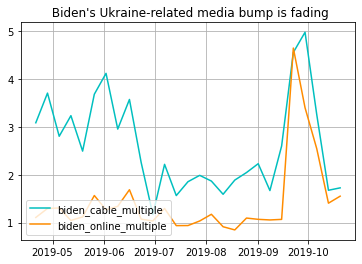

In [210]:
plt.plot( data_for_graph['biden_cable_multiple'], 'c')
plt.plot( data_for_graph['biden_online_multiple'], color = 'darkorange')
plt.legend(['biden_cable_multiple', 'biden_online_multiple'], loc=3)

plt.title(" Biden's Ukraine-related media bump is fading" )

#추가
plt.grid(True)

plt.show()

In [199]:
# c = df['country'] == 'South Korea'

df[df['country'] == ' usa']
df['country'].unique() == 

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'France', 'Faeroe Islands', 'Micronesia, Fed. Sts.', 'Gabon',
       'United Kingdom', 'Georgia', 'G